In [19]:
from __future__ import division, print_function
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Activation, Embedding, Conv2D, GlobalMaxPooling1D, BatchNormalization
from tensorflow.python.keras.datasets import imdb
import tensorflow as tf


In [20]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5, 5),padding='same',input_shape=(256, 256, 1),activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))#128*128
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(3, 3),padding='same',activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))#64*64
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3, 3),padding='same',activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))#32*32
model.add(Dropout(0.25))

model.add(Conv2D(filters=128,kernel_size=(3, 3),padding='same',activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))#16*16
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3, 3),padding='same',activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))#8*8
model.add(Dropout(0.25))

model.add(Conv2D(filters=1,kernel_size=(3, 3),padding='same',activation='relu')) 

model.summary()
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 16)      416       
_________________________________________________________________
batch_normalization_5 (Batch (None, 256, 256, 16)      64        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)       

In [38]:
shapeness1=np.load('/home/chase/Boyka/Lyu/data/shapeness/origin/rainfall_img256_sharpness1_unit8.npz')
data=shapeness1['data'][:,-1]
label=shapeness1['rainfall']
# data=np.load('/home/chase/Boyka/Lyu/data/rainfall/reg/data_reg_2000.npy')
data=np.expand_dims(data,axis=-1)
# data=torch.from_numpy(data)
# data=torch.FloatTensor(data)
# print(type(data[0][0][0]))
# print(data[0][0][0])
# label=np.load('/home/chase/Boyka/Lyu/data/rainfall/reg/label_reg_2000.npy')
print(label.shape)
label=np.expand_dims(label,axis=-1)
# label=torch.from_numpy(label)
# label=torch.FloatTensor(label)
# print(label[0][0][0])
# print(data.shape,label.shape)
train_x=data[:-20]
test_x=data[-20:]
train_y=label[:-20]
test_y=label[-20:]
print(data.shape,label.shape)




(100, 8, 8)
(100, 256, 256, 1) (100, 8, 8, 1)


In [39]:
BATCH_SIZE=32
tf.config.experimental_run_functions_eagerly(True)
model.fit(train_x, train_y, epochs=500, batch_size=32, validation_data=(test_x, test_y),shuffle=True)
score, _ = model.evaluate(test_x, test_y, batch_size=32)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
 


/home/chase/.local/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 1/500
3/3 [==============================] - 2s 729ms/step - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0557 - val_mean_squared_error: 0.0557
Epoch 2/500
3/3 [==============================] - 2s 713ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0539 - val_mean_squared_error: 0.0539
Epoch 3/500
3/3 [==============================] - 2s 726ms/step - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0589 - val_mean_squared_error: 0.0589
Epoch 4/500
3/3 [==============================] - 2s 727ms/step - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 5/500
3/3 [==============================] - 2s 729ms/step - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 6/500
3/3 [==============================] - 2s 729ms/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 7/500
3/3 [=================

3/3 [==============================] - 2s 729ms/step - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0625 - val_mean_squared_error: 0.0625
Epoch 52/500
3/3 [==============================] - 2s 730ms/step - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0613 - val_mean_squared_error: 0.0613
Epoch 53/500
3/3 [==============================] - 2s 722ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0876 - val_mean_squared_error: 0.0876
Epoch 54/500
3/3 [==============================] - 2s 725ms/step - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0929 - val_mean_squared_error: 0.0929
Epoch 55/500
3/3 [==============================] - 2s 728ms/step - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.0967 - val_mean_squared_error: 0.0967
Epoch 56/500
3/3 [==============================] - 2s 732ms/step - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0863 - val_mean_squared_error: 0.0863
Epoch 57/500
3/3 [=======================

Epoch 102/500
3/3 [==============================] - 2s 722ms/step - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0708 - val_mean_squared_error: 0.0708
Epoch 103/500
3/3 [==============================] - 2s 732ms/step - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0603 - val_mean_squared_error: 0.0603
Epoch 104/500
3/3 [==============================] - 2s 726ms/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0760 - val_mean_squared_error: 0.0760
Epoch 105/500
3/3 [==============================] - 2s 729ms/step - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.1089 - val_mean_squared_error: 0.1089
Epoch 106/500
3/3 [==============================] - 2s 733ms/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.1039 - val_mean_squared_error: 0.1039
Epoch 107/500
3/3 [==============================] - 2s 728ms/step - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.1157 - val_mean_squared_error: 0.1157
Epoch 108/500
3/3 [===

3/3 [==============================] - 3s 953ms/step - loss: 0.0649 - mean_squared_error: 0.0649 - val_loss: 0.3103 - val_mean_squared_error: 0.3103
Epoch 153/500
3/3 [==============================] - 3s 819ms/step - loss: 0.0567 - mean_squared_error: 0.0567 - val_loss: 0.3136 - val_mean_squared_error: 0.3136
Epoch 154/500
3/3 [==============================] - 3s 816ms/step - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.2898 - val_mean_squared_error: 0.2898
Epoch 155/500
3/3 [==============================] - 3s 811ms/step - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.2739 - val_mean_squared_error: 0.2739
Epoch 156/500
3/3 [==============================] - 3s 815ms/step - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 0.2828 - val_mean_squared_error: 0.2828
Epoch 157/500
3/3 [==============================] - 3s 813ms/step - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.2673 - val_mean_squared_error: 0.2673
Epoch 158/500
3/3 [=================

3/3 [==============================] - 2s 727ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0675 - val_mean_squared_error: 0.0675
Epoch 203/500
3/3 [==============================] - 2s 729ms/step - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0644 - val_mean_squared_error: 0.0644
Epoch 204/500
3/3 [==============================] - 2s 744ms/step - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0635 - val_mean_squared_error: 0.0635
Epoch 205/500
3/3 [==============================] - 2s 737ms/step - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.0592 - val_mean_squared_error: 0.0592
Epoch 206/500
3/3 [==============================] - 2s 728ms/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0536 - val_mean_squared_error: 0.0536
Epoch 207/500
3/3 [==============================] - 2s 738ms/step - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0501 - val_mean_squared_error: 0.0501
Epoch 208/500
3/3 [=================

3/3 [==============================] - 2s 732ms/step - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.0792 - val_mean_squared_error: 0.0792
Epoch 253/500
3/3 [==============================] - 2s 732ms/step - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0697 - val_mean_squared_error: 0.0697
Epoch 254/500
3/3 [==============================] - 2s 734ms/step - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0659 - val_mean_squared_error: 0.0659
Epoch 255/500
3/3 [==============================] - 2s 740ms/step - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.0629 - val_mean_squared_error: 0.0629
Epoch 256/500
3/3 [==============================] - 2s 731ms/step - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 257/500
3/3 [==============================] - 2s 735ms/step - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0678 - val_mean_squared_error: 0.0678
Epoch 258/500
3/3 [=================

3/3 [==============================] - 2s 734ms/step - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.1043 - val_mean_squared_error: 0.1043
Epoch 303/500
3/3 [==============================] - 2s 734ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.1074 - val_mean_squared_error: 0.1074
Epoch 304/500
3/3 [==============================] - 2s 712ms/step - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.1031 - val_mean_squared_error: 0.1031
Epoch 305/500
3/3 [==============================] - 2s 723ms/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.1005 - val_mean_squared_error: 0.1005
Epoch 306/500
3/3 [==============================] - 2s 725ms/step - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.1028 - val_mean_squared_error: 0.1028
Epoch 307/500
3/3 [==============================] - 2s 739ms/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1027 - val_mean_squared_error: 0.1027
Epoch 308/500
3/3 [=================

3/3 [==============================] - 2s 737ms/step - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0659 - val_mean_squared_error: 0.0659
Epoch 353/500
3/3 [==============================] - 2s 732ms/step - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0673 - val_mean_squared_error: 0.0673
Epoch 354/500
3/3 [==============================] - 2s 735ms/step - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0677 - val_mean_squared_error: 0.0677
Epoch 355/500
3/3 [==============================] - 2s 734ms/step - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0675 - val_mean_squared_error: 0.0675
Epoch 356/500
3/3 [==============================] - 2s 724ms/step - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 357/500
3/3 [==============================] - 2s 732ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0756 - val_mean_squared_error: 0.0756
Epoch 358/500
3/3 [=================

3/3 [==============================] - 2s 734ms/step - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 403/500
3/3 [==============================] - 2s 717ms/step - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 404/500
3/3 [==============================] - 2s 726ms/step - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 405/500
3/3 [==============================] - 2s 725ms/step - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 406/500
3/3 [==============================] - 2s 727ms/step - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 407/500
3/3 [==============================] - 2s 730ms/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 408/500
3/3 [=================

3/3 [==============================] - 2s 729ms/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0814 - val_mean_squared_error: 0.0814
Epoch 453/500
3/3 [==============================] - 2s 758ms/step - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.1005 - val_mean_squared_error: 0.1005
Epoch 454/500
3/3 [==============================] - 2s 732ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.1114 - val_mean_squared_error: 0.1114
Epoch 455/500
3/3 [==============================] - 2s 730ms/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.1156 - val_mean_squared_error: 0.1156
Epoch 456/500
3/3 [==============================] - 2s 728ms/step - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.1044 - val_mean_squared_error: 0.1044
Epoch 457/500
3/3 [==============================] - 2s 721ms/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0876 - val_mean_squared_error: 0.0876
Epoch 458/500
3/3 [=================

In [40]:
pre = model.predict(test_x, batch_size=BATCH_SIZE)

In [45]:
print(pre.shape,test_y.shape)
pre=np.squeeze(pre,-1)
pre.shape

(20, 8, 8, 1) (20, 8, 8)


(20, 8, 8)

In [42]:
test_y=np.squeeze(test_y,-1)
test_y.shape

(20, 8, 8)

In [46]:
error=np.abs(pre-test_y)

In [47]:
error.shape

(20, 8, 8)

In [48]:
mae=np.mean(np.abs(pre-test_y),axis=0)
mse=np.mean(np.square(pre-test_y),axis=0)


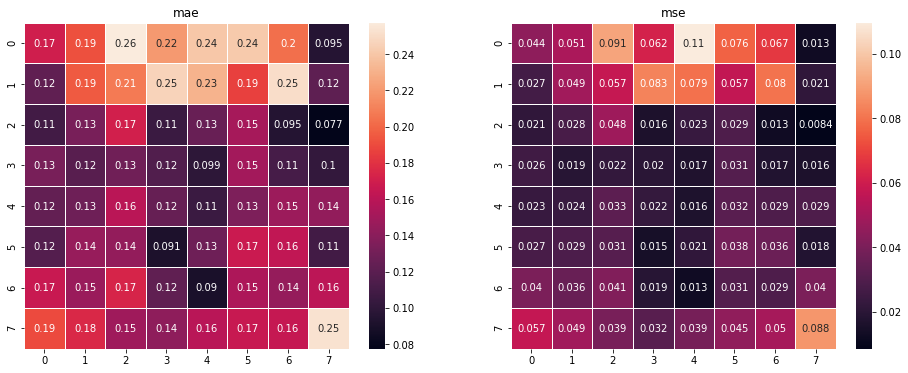

In [49]:
import seaborn as sns
plt.figure(figsize=(16,6))
ax1 =plt.subplot(121)
ax1.set_title('mae')
h=sns.heatmap(mae, annot=True,linewidths=0.5)  

ax2=plt.subplot(122)
ax2.set_title('mse')
h=sns.heatmap(mse, annot=True,linewidths=0.5)  
